In [182]:
#The dataset to be predicted (1 minute recording from muse-lsl)

dataset = "lostinmigration_EEG_recording_2021-09-27-13.42.18.csv"

In [183]:
from joblib import dump, load

In [184]:
#The trained model 

model = load('model.joblib') 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [185]:
import shutil
import os
try: 
    shutil.rmtree("testing_data/")
    print("deleted testing_data/")
except FileNotFoundError:
    print("folder testing_data/ does not exist")
    
print("creating testing_data/")
os.mkdir("testing_data/")

deleted testing_data/
creating testing_data/


In [186]:
df = pd.read_csv(dataset)
df

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.632750e+09,-18.555,-20.508,-23.926,-0.488,0.0
1,1.632750e+09,41.504,-11.719,-13.184,140.625,0.0
2,1.632750e+09,1.953,-9.277,-22.461,12.695,0.0
3,1.632750e+09,-72.754,-16.602,-27.832,-131.836,0.0
4,1.632750e+09,-81.055,-24.414,-33.203,-142.578,0.0
...,...,...,...,...,...,...
10531,1.632750e+09,15.625,-17.578,-31.738,34.668,0.0
10532,1.632750e+09,38.574,-13.672,-25.391,102.539,0.0
10533,1.632750e+09,12.207,-5.859,-23.438,-12.207,0.0
10534,1.632750e+09,-31.250,-14.648,-26.855,-84.961,0.0


In [187]:
#Since the data is recorded using muse-lsl, rescaling is not required

import pandas as pd
import numpy as np



df = pd.read_csv(dataset)

muse_data_subset = df 


# muse_data_subset.index = muse_data_subset.timestamps.values.astype('datetime64[ms]')
muse_data_subset.index = pd.to_datetime(muse_data_subset.timestamps.astype('datetime64[s]'))

# muse_data_subset = muse_data_subset[["timestamps", 'TP9', 'AF7', 'AF8', 'TP10', 'Right AUX']]

# muse_data_subset = muse_data_subset.resample("4ms", how="mean", fill_method='bfill')


muse_data_subset = muse_data_subset.resample("4ms").mean().bfill()

# muse_data_subset.columns = ["TP9", "AF7", "AF8", "TP10", "Right AUX"]

muse_data_subset["timestamps"] = pd.to_datetime(muse_data_subset.index, unit='s')

muse_data_subset["timestamps"] = pd.to_datetime(muse_data_subset["timestamps"], unit='s').apply(lambda x: x.timestamp())

muse_data_subset = muse_data_subset[["timestamps", "TP9", "AF7", "AF8", "TP10", "Right AUX"]]
    
    
muse_data_subset.to_csv("testing_data/muse_data_subset-lostinmigration-546728863431538125.csv", index=False) #giving random name, doesn't matter

In [188]:
muse_data_subset.head(10)

,timestamps,TP9,AF7,AF8,TP10,Right AUX
timestamps,,,,,,
2021-09-27 13:42:17.000,1.632750e+09,-28.961125,-20.721375,-26.275688,-12.664813,0.0
2021-09-27 13:42:17.004,1.632750e+09,-23.410766,-24.694453,-24.938586,-14.669422,0.0
2021-09-27 13:42:17.008,1.632750e+09,-23.410766,-24.694453,-24.938586,-14.669422,0.0
2021-09-27 13:42:17.012,1.632750e+09,-23.410766,-24.694453,-24.938586,-14.669422,0.0
2021-09-27 13:42:17.016,1.632750e+09,-23.410766,-24.694453,-24.938586,-14.669422,0.0
2021-09-27 13:42:17.020,1.632750e+09,-23.410766,-24.694453,-24.938586,-14.669422,0.0
2021-09-27 13:42:17.024,1.632750e+09,-23.410766,-24.694453,-24.938586,-14.669422,0.0
2021-09-27 13:42:17.028,1.632750e+09,-23.410766,-24.694453,-24.938586,-14.669422,0.0
2021-09-27 13:42:17.032,1.632750e+09,-23.410766,-24.694453,-24.938586,-14.669422,0.0


In [189]:
from EEG_generate_training_matrix import gen_training_matrix

data_directory_path = "testing_data/"
preprocessed_data_file_name = "out_main.csv"

print("generating training matrix...")
gen_training_matrix(data_directory_path, preprocessed_data_file_name, cols_to_ignore = -1)

generating training matrix...
Using file muse_data_subset-lostinmigration-546728863431538125.csv
logm result may be inaccurate, approximate err = 1.8326066074530896e-11


/opt/anaconda3/lib/python3.7/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:829: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:838: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearlySingularWarning)


resulting vector shape for the file (82, 989)
FINAL_MATRIX (82, 989)


In [190]:
nRowsRead = None # specify 'None' if want to read whole file
# mental-state.csv has 2360 rows in reality, but we are only loading/previewing the first 1000 rows
preprocessed_data_file_name = "out_main.csv"
df = pd.read_csv(preprocessed_data_file_name, delimiter=',', nrows = nRowsRead)
df.dataframeName = preprocessed_data_file_name
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 82 rows and 989 columns


In [191]:
df = df.applymap(complex)
df = df.astype(float)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:729: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [192]:
X_muse_test = df.drop("Label", axis=1)

In [193]:
y_muse_pred = model.predict(X_muse_test)

In [194]:
y_muse_pred_proba = model.predict_proba(X_muse_test)

In [195]:
relaxed_percentage = y_muse_pred_proba[:,0].mean()

In [196]:
active_percentage = y_muse_pred_proba[:,1].mean()

In [197]:
print("relaxed percentage:",relaxed_percentage)
print("active percentage:", active_percentage)

relaxed percentage: 0.8757317073170732
active percentage: 0.12426829268292683


In [198]:
active_values = y_muse_pred_proba[:,1]
relaxed_values = y_muse_pred_proba[:,0]

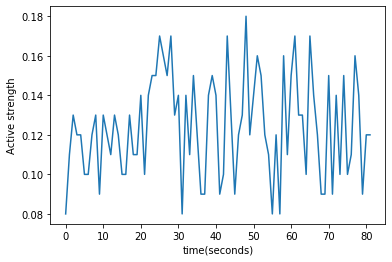

In [199]:
import matplotlib.pyplot as plt
plt.plot(active_values, label="active chart")
plt.ylabel('Active strength')
plt.xlabel('time(seconds)')
plt.show()


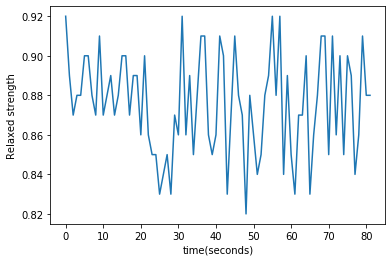

In [200]:
import matplotlib.pyplot as plt
plt.plot(relaxed_values, label="relaxed chart")
plt.ylabel('Relaxed strength')
plt.xlabel('time(seconds)')
plt.show()


In [201]:
X_muse_test.shape

(82, 988)